# The Sparks Foundation - Data Science & Business Analytics Internship
## Task 1: Prediction using Supervised ML
*Author: Ayushmi Adhikari*

In this assignment, the goal is to utilize the Linear Regression supervised machine learning algorithm to forecast a student's percentage based on the number of hours they have studied.

| The Question to be answered :                          | 
| ------------------------------------------------------ | 
| What will be predicted score if a student studies for 9.25 hrs/day? |


| **Step**                          | **Description**                                     |
| ---------------------------------- | ---------------------------------------------------- |
| **Importing dataset**             | Loading the dataset into the notebook.               |
| **Visualizing dataset**           | Creating visualizations to understand the data.      |
| **Data preparation**              | Cleaning and organizing data for model training.     |
| **Training the algorithm**        | Using the dataset to train the Linear Regression model. |
| **Visualizing the data**          | Plotting graphs or visual representations of the data. |
| **Making predictions**            | Applying the trained model to make predictions.      |
| **Evaluating model metrics**      | Assessing the model's performance with various metrics. |


**Step 1-Importing all the necessary Libraries and Loading Data:**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Reading the dataset from the given link
data_url = "http://bit.ly/w-data"
dataset = pd.read_csv(data_url)

In [4]:
print("First few rows of the dataset:")
dataset.head()

First few rows of the dataset:


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
print("Last few rows of the dataset:")
dataset.tail()

Last few rows of the dataset:


,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [6]:
print("Shape of the dataset:", dataset.shape)

Shape of the dataset: (25, 2)


**Step 2-Visualizing The Dataset**

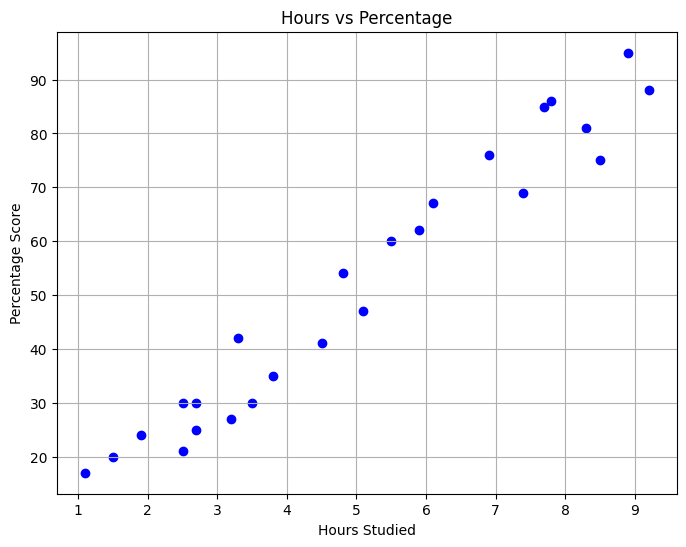

In [10]:
# Visualize the distribution of scores using a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(dataset['Hours'], dataset['Scores'], color='blue', marker='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.grid(True)
plt.show()

**Step 3-Data Preparation and Splitting**

In [8]:
from sklearn.model_selection import train_test_split  
# Extracting independent variable (X) and dependent variable (y)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

# Splitting the data into testing and training sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

**Step 4-Training the Linear Regression Model**

In [9]:
from sklearn.linear_model import LinearRegression 

# Training the Linear Regression model:
regressor_model = LinearRegression()  
regressor_model.fit(X_train, y_train) 
print("Training is complete.")

Training is complete.


**Step 5-Making Predictions**

In [11]:
# Making predictions
hours_studied = 9.25
predicted_score = regressor_model.predict([[hours_studied]])

# Display the predicted score for a student who studies 9.25 hours/day
print("\nPredicted score for studying 9.25 hours/day:", predicted_score[0])


Predicted score for studying 9.25 hours/day: 93.69173248737535


**Step 6-Evaluating Model Metrics**

In [13]:
from sklearn import metrics

# Making predictions on the test set
y_pred = regressor_model.predict(X_test)

# Evaluating model metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)

# Displaying the metrics
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.598769307217406
R-squared: 0.9454906892105355


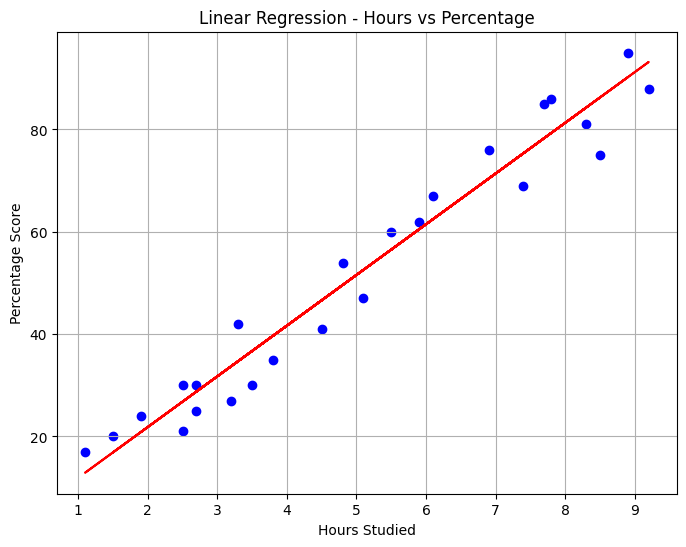

In [12]:
# Visualizing the regression line
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', marker='o')
plt.plot(X, regressor_model.predict(X), color='red')
plt.title('Linear Regression - Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.grid(True)
plt.show()

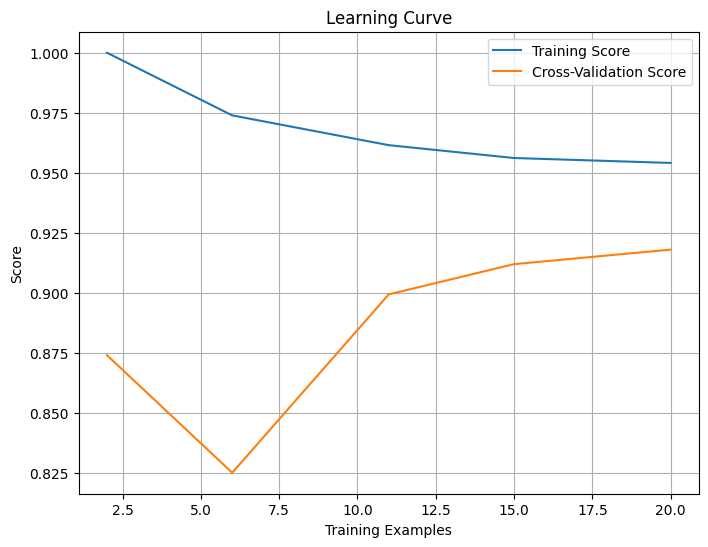

In [15]:
from sklearn.model_selection import learning_curve

# Learning curve
train_sizes, train_scores, test_scores = learning_curve(regressor_model, X, y, cv=5)
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Cross-Validation Score')
plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()
